<a href="https://colab.research.google.com/github/demo-helloworld-1/MLplayground/blob/main/Sentianalysiswithcsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk textblob

In [2]:
import nltk
from textblob import TextBlob

punkt helps with tokenization—breaking your text into individual words or sentences—while vader_lexicon is great for sentiment analysis using the VADER (Valence Aware Dictionary and sEntiment Reasoner) tool.

In [3]:
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'
# Example usage:
text = "I need to buy this product again and again, but this product could be much better"
sentiment = analyze_sentiment(text)
print(f"Sentiment: {sentiment}")

Sentiment: positive


In [5]:
import nltk
from textblob import TextBlob


def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Calculate sentiment percentages
    positive_percentage = (analysis.sentiment.polarity + 1) / 2 * 100
    negative_percentage = (1 - analysis.sentiment.polarity) / 2 * 100

    # Classify sentiment based on percentages
    if positive_percentage > negative_percentage:
        sentiment = 'positive'
    elif positive_percentage < negative_percentage:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    # Return sentiment and percentages
    return sentiment, positive_percentage, negative_percentage

# Example usage
text = "Goutham has too many problems, but he is capable of handling it"
sentiment, positive_percentage, negative_percentage = analyze_sentiment(text)

print(f"Sentiment: {sentiment}")
print(f"Positive Percentage: {positive_percentage:.2f}%")
print(f"Negative Percentage: {negative_percentage:.2f}%")

Sentiment: positive
Positive Percentage: 67.50%
Negative Percentage: 32.50%


In [6]:
pip install kagglehub

In [7]:
import pandas as pd
import kagglehub
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")
try:
       df = pd.read_csv(path+'/train.csv', encoding='utf-8')
except UnicodeDecodeError:
       df = pd.read_csv(path+'/train.csv', encoding='latin-1')

In [8]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

In [9]:
def analyze_sentiment_file(text):
    # Convert the input to string before processing
    text = str(text)
    analysis = TextBlob(text)
    # Classify sentiment as positive, negative, or neutral
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

In [10]:
df['sentiment'] = df['text'].apply(analyze_sentiment_file)  # Assuming your feedback column is named 'feedback'

In [11]:
print(df[['text', 'sentiment']].head(20))  # Print the relevant columns
# df.to_excel('output_file.xlsx', index=False)  # Save results to a new Excel file (optional)

                                                 text sentiment
0                 I`d have responded, if I were going   neutral
1       Sooo SAD I will miss you here in San Diego!!!  negative
2                           my boss is bullying me...   neutral
3                      what interview! leave me alone   neutral
4    Sons of ****, why couldn`t they put them on t...   neutral
5   http://www.dothebouncy.com/smf - some shameles...  positive
6   2am feedings for the baby are fun when he is a...  positive
7                                          Soooo high  positive
8                                         Both of you   neutral
9    Journey!? Wow... u just became cooler.  hehe....  positive
10   as much as i love to be hopeful, i reckon the...  positive
11  I really really like the song Love Story by Ta...  positive
12       My Sharpie is running DANGERously low on ink   neutral
13  i want to go to music tonight but i lost my vo...   neutral
14                         test test fro

# Lets Begin with Senti Analysis on one of the Twitter's Dataset

Credits: Kaggle Open Dataset

1. Handle Missing Values

In [12]:
# Checking for missing values
print(df.isnull().sum())

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [13]:
# Dropping rows with missing values
df.dropna(inplace=True)

# Alternatively, you can fill missing values with a specific value
# df.fillna("missing", inplace=True)


Now lets Cleanz the values, this handles the tags, URLs and Stopping Words("the, is, in")

In [14]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Function to clean text
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]  # Remove stopwords
    text = ' '.join(text)
    return text

# Apply the clean_text function to the DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(df[['text','cleaned_text']].head(20))  # Print the relevant columns
# df.to_excel('output_file.xlsx', index=False)  # Save results to a new Excel file (optional)

                                                 text  \
0                 I`d have responded, if I were going   
1       Sooo SAD I will miss you here in San Diego!!!   
2                           my boss is bullying me...   
3                      what interview! leave me alone   
4    Sons of ****, why couldn`t they put them on t...   
5   http://www.dothebouncy.com/smf - some shameles...   
6   2am feedings for the baby are fun when he is a...   
7                                          Soooo high   
8                                         Both of you   
9    Journey!? Wow... u just became cooler.  hehe....   
10   as much as i love to be hopeful, i reckon the...   
11  I really really like the song Love Story by Ta...   
12       My Sharpie is running DANGERously low on ink   
13  i want to go to music tonight but i lost my vo...   
14                         test test from the LG enV2   
15                              Uh oh, I am sunburned   
16   S`ok, trying to plot alter

Stemming/Lemmatization

Stemming reduces words to their base or root form. For example:

"running" -> "run" |
"runner" -> "run" |
"runs" -> "run" 

Lemmatization reduces words to their root form, but it considers the context and transforms words into their meaningful base forms. For example:

"running" -> "run" |
"better" -> "good"

In [16]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function to stem/lemmatize text
def stem_lemmatize_text(text):
    text = text.split()
    text = [stemmer.stem(word) for word in text]  # Stemming
    text = [lemmatizer.lemmatize(word) for word in text]  # Lemmatization
    text = ' '.join(text)
    return text

# Apply the stem_lemmatize_text function to the cleaned text
df['processed_text'] = df['cleaned_text'].apply(stem_lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
print(df[['cleaned_text','processed_text']].head(20))  # Print the relevant columns
# df.to_excel('output_file.xlsx', index=False)  # Save results to a new Excel file (optional)

                                         cleaned_text  \
0                                  id responded going   
1                             sooo sad miss san diego   
2                                       boss bullying   
3                               interview leave alone   
4            sons couldnt put releases already bought   
5         shameless plugging best rangers forum earth   
6                   2am feedings baby fun smiles coos   
7                                          soooo high   
8                                                       
9           journey wow u became cooler hehe possible   
10  much love hopeful reckon chances minimal p im ...   
11    really really like song love story taylor swift   
12                sharpie running dangerously low ink   
13                   want go music tonight lost voice   
14                                  test test lg env2   
15                                    uh oh sunburned   
16            sok trying plot a

### Exploratory Data Analysis

In [18]:
# Word count distribution
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))
print(df['word_count'].describe())

# Sentence length distribution
df['sentence_length'] = df['processed_text'].apply(lambda x: len(x))
print(df['sentence_length'].describe())


count    27480.000000
mean         7.304803
std          3.961223
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         25.000000
Name: word_count, dtype: float64
count    27480.000000
mean        39.598362
std         21.921187
min          0.000000
25%         22.000000
50%         37.000000
75%         56.000000
max        127.000000
Name: sentence_length, dtype: float64


This provides summary statistics for the word count in your dataset:

count: The number of text entries in your dataset.

mean: The average number of words per text entry.

std: The standard deviation, which tells you how much the word counts vary from the mean.

min: The minimum word count in your dataset.

25% (1st quartile): The word count at the 25th percentile.

50% (median): The word count at the 50th percentile (middle value).

75% (3rd quartile): The word count at the 75th percentile.

max: The maximum word count in your dataset.

This provides summary statistics for the sentence length in your dataset:

count: The number of text entries in your dataset.

mean: The average number of characters per text entry.

std: The standard deviation, which tells you how much the sentence lengths vary from the mean.

min: The minimum sentence length in your dataset.

25% (1st quartile): The sentence length at the 25th percentile.

50% (median): The sentence length at the 50th percentile (middle value).

75% (3rd quartile): The sentence length at the 75th percentile.

max: The maximum sentence length in your dataset.

In [19]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


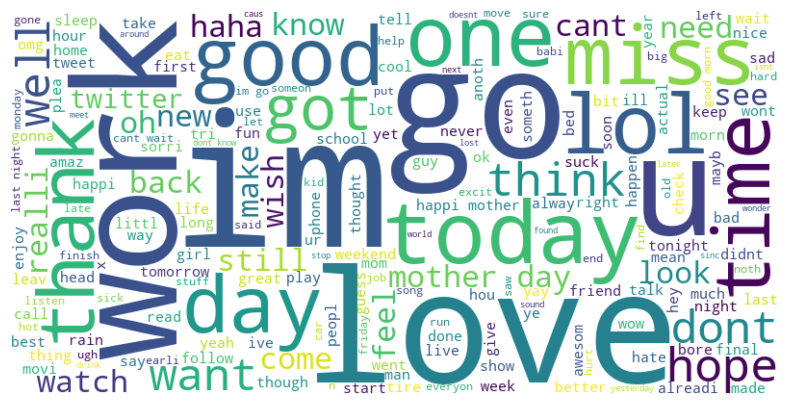

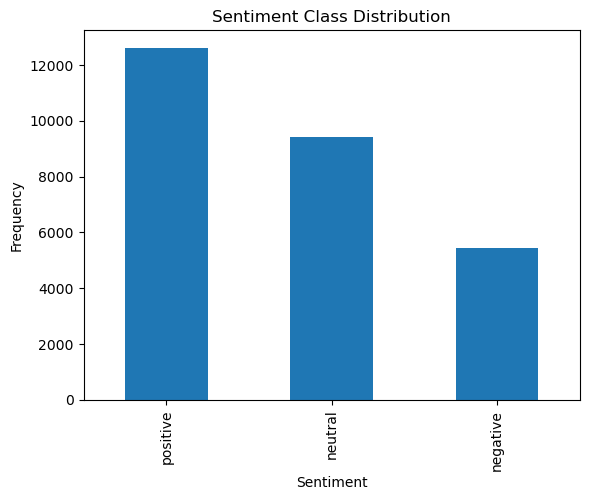

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['processed_text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Bar chart for sentiment class frequency
df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()


### 3. Feature Engineering

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the processed text
X = count_vectorizer.fit_transform(df['processed_text'])

# Check the shape of the resulting matrix
print(X.shape)


(27480, 5000)


CountVectorizer is a powerful tool provided by the scikit-learn library in Python for converting a collection of text documents into a matrix of token counts.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8624454148471615
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.69      0.76      1114
     neutral       0.84      0.92      0.88      1882
    positive       0.89      0.89      0.89      2500

    accuracy                           0.86      5496
   macro avg       0.86      0.84      0.84      5496
weighted avg       0.86      0.86      0.86      5496

Confusion Matrix:
[[ 774  177  163]
 [  49 1732  101]
 [ 102  164 2234]]


### Save the Model

In [23]:
import pickle

# Save the model to a file
with open('sentiment_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [24]:
import pickle

# Load the model from the file
with open('sentiment_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [25]:
# Example new text data
new_texts = ["I was really looking forward to this event, but after attending, I found it to be an utter disappointment due to the poor organization, rude staff, and lack of promised activities, although I met some wonderful people."]

# Transform the new text data using the same Count Vectorizer
new_texts_transformed = count_vectorizer.transform(new_texts)

# Predict sentiments
new_predictions = loaded_model.predict(new_texts_transformed)

print(new_predictions)


['negative']


## Yes, we are Done with it